In [150]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

This is a private notebook to check out the use of Random Forest Classifiers

In [151]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os 

In [152]:
# print(filenames)
path = "\\".join(os.getcwd().split("\\")[:-1]) + "\code"

df = pd.read_csv(path+"\\titanic.csv")
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [153]:
df.drop(['Cabin','PassengerId','Name','Ticket'],axis=1,inplace=True)
df = df.fillna(0)
print(df)

     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female   0.0      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]


In [154]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# print(type(df['Sex'][0]))
df['Sex'] = le.fit_transform(df['Sex'])
# print(type(df['Embarked'][0]))
# made the 'Embarked' to string cause it bugged the embedding
df['Embarked']=le.fit_transform( df.astype({'Embarked':str})['Embarked'])
# print(df)

Make a box and whisker plot to check for outliers

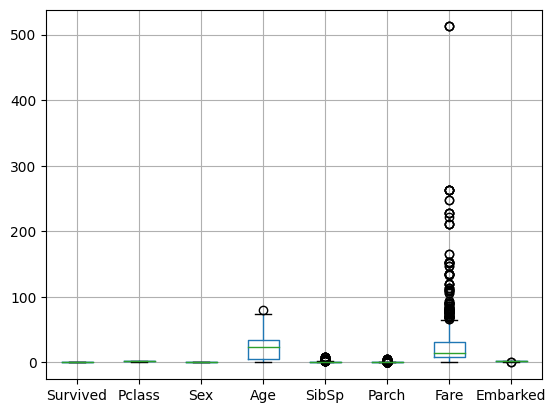

In [155]:
boxplot = df.boxplot(column=list(df.columns))
plt.show()

Find the population in each label

Number of rows with label 0: 549
Number of rows with label 1: 342


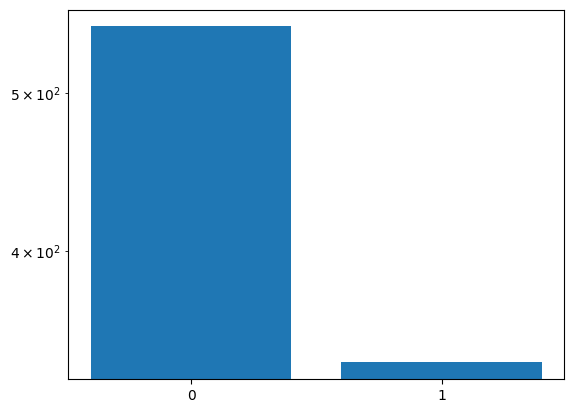

In [156]:
preproccessed_data = df 
listOfLabels = list(set(preproccessed_data["Survived"]))
listOfLabels.sort()


for label in listOfLabels:
    length = len(preproccessed_data.loc[preproccessed_data["Survived"] == label])
    print(f"Number of rows with label {label}: {length}")

# plt.subplot(2,1,1)

ax = plt.bar(
    [str(x) for x in listOfLabels],
    [
        len(preproccessed_data.loc[preproccessed_data["Survived"] == label])
        for label in listOfLabels
    ],
    log=True,
)
plt.show()

In [157]:
# Feature Variable to X
X = df.drop('Survived',axis=1)
#Putting response variable to y
y = df['Survived']


In [158]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=42)

In [159]:
from sklearn.ensemble import RandomForestClassifier

# clf = RandomForestClassifier(n_estimators=100, class_weight="balanced"
clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

RandomForestClassifier()

In [160]:
pred = clf.predict(X_test)
print(pred)

[0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1
 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0
 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1
 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 1 1 1 1 0 0 0 0 1]


In [161]:
from sklearn.metrics import classification_report
rand_score = clf.score(X_test,y_test)

classification_report_rf = classification_report(y_test,pred)
print("Accuracy score: ",rand_score)

Accuracy score:  0.8059701492537313


In [162]:
#Visualizing the Results
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

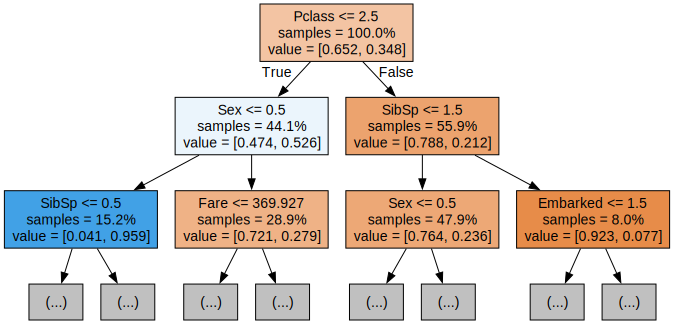

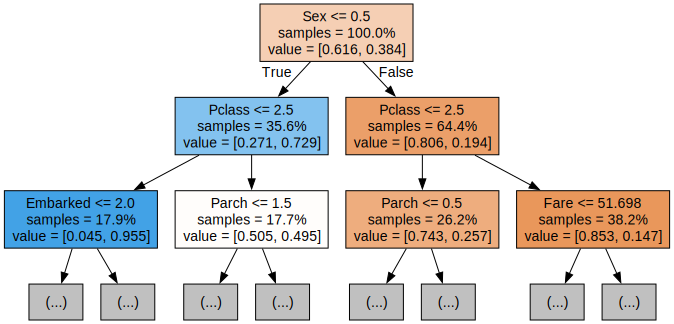

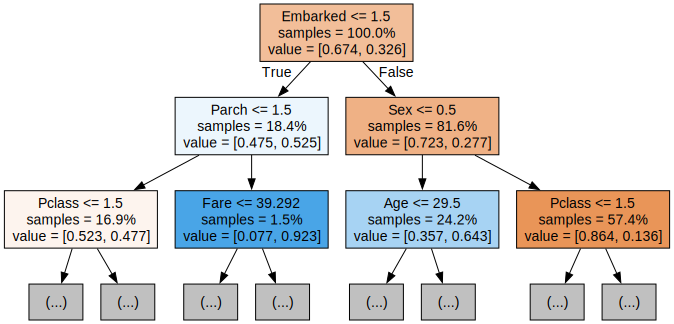

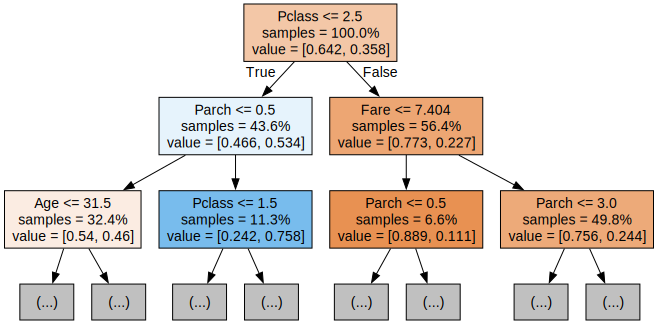

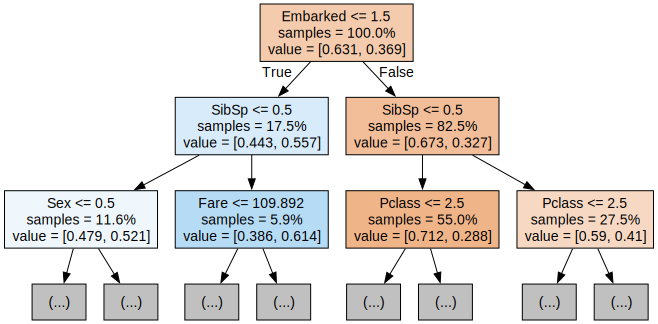

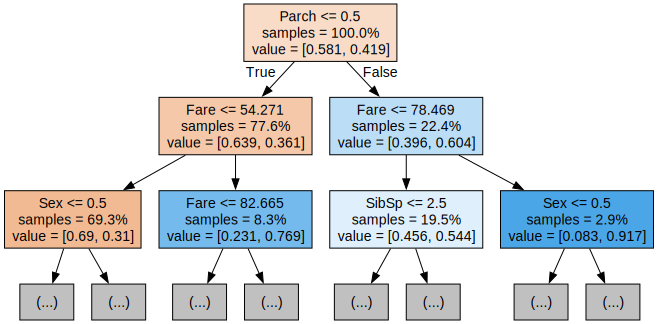

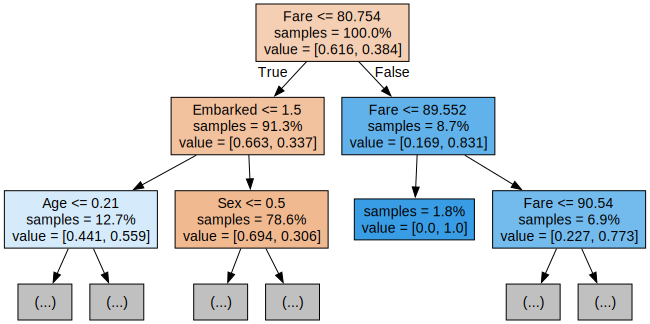

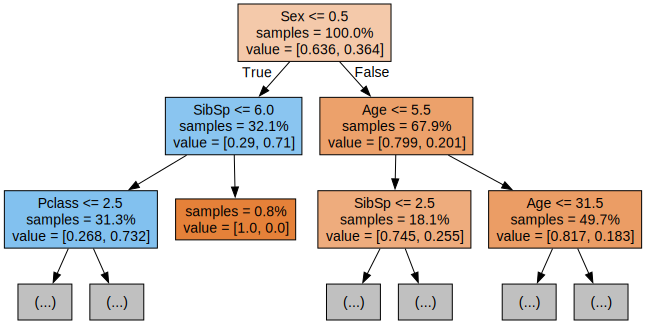

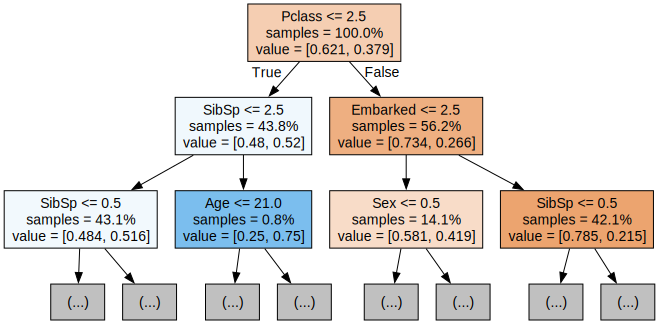

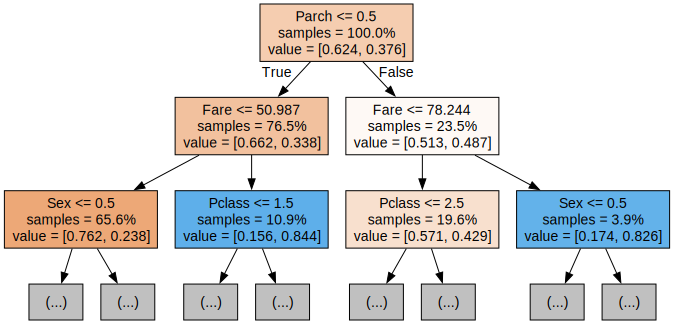

In [163]:
for i in range(len(clf.estimators_)//10):
    tree = clf.estimators_[i]
    dot_data = export_graphviz(tree,
                              feature_names = X_train.columns,
                              filled=True, 
                              max_depth=2,
                              impurity=False,
                              proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [164]:
#In case of finding the best hyperparameters
from random import randint
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'n_estimators':range(50,500),
              'max_depth':range(1,20)}

clf = RandomForestClassifier()

rand_search = RandomizedSearchCV(clf,
                                param_distributions = param_dist,
                                n_iter=5,
                                cv=5)

rand_search.fit(X_train,y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': range(1, 20),
                                        'n_estimators': range(50, 500)})

In [165]:
best_clf = rand_search.best_estimator_

print("Best hyperparameters: ", rand_search.best_params_)

Best hyperparameters:  {'n_estimators': 168, 'max_depth': 9}


In [166]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
    n_estimators=rand_search.best_params_["n_estimators"],
    max_depth=rand_search.best_params_["max_depth"]
)

clf.fit(X_train,y_train)
pred = clf.predict(X_test)
# print(pred)
from sklearn.metrics import classification_report
rand_score = clf.score(X_test,y_test)

classification_report_rf = classification_report(y_test,pred)
print("Accuracy score: ",rand_score)

Accuracy score:  0.8022388059701493
